## Programming Assignment-3

In [8]:
# C. Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association rules you can extract 
# from your dataset? (0.5 point) (see http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np

class GroceryItemsAnalysis:
    def __init__(self, filename, min_support, min_confidence):
        self.filename = filename
        self.min_support = min_support
        self.min_confidence = min_confidence
        self.data_frame = None
        self.encoded_dataframe = None
        self.frequent_itemsets = None
        self.rules = None
        
    def load_and_clean_data(self):
        self.data_frame = pd.read_csv(self.filename)
        cleanedData = self.data_frame.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
        return cleanedData
    
    def encode_transactions(self, cleanedData):
        transaction_encoder = TransactionEncoder()
        encoded_array = transaction_encoder.fit(cleanedData).transform(cleanedData)
        self.encoded_dataframe = pd.DataFrame(encoded_array, columns=transaction_encoder.columns_)
    
    def find_frequent_itemsets(self):
        self.frequent_itemsets = apriori(self.encoded_dataframe, min_support=self.min_support, use_colnames=True)
    
    def generate_rules(self):
        self.rules = association_rules(self.frequent_itemsets, metric="confidence", min_threshold=self.min_confidence)
        return self.rules

    def run_analysis(self):
        cleaned_data = self.load_and_clean_data()
        self.encode_transactions(cleaned_data)
        self.find_frequent_itemsets()
        return self.generate_rules()

gia = GroceryItemsAnalysis("Grocery_Items_1.csv", min_support=0.01, min_confidence=0.1)
rules = gia.run_analysis()
print(gia.encoded_dataframe)
print(gia.frequent_itemsets)

      Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                     False     False             False             False   
1                     False     False             False             False   
2                     False     False             False             False   
3                     False     False             False             False   
4                     False     False             False             False   
...                     ...       ...               ...               ...   
7995                  False     False             False             False   
7996                  False     False             False             False   
7997                  False     False             False             False   
7998                  False     False             False             False   
7999                  False     False             False             False   

      baby cosmetics   bags  baking powder  bathroom cleaner   beef  berrie

In [9]:
# association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(other vegetables),0.111000,0.120375,0.011875,0.106982,0.888739,-0.001487,0.985003,-0.123438
1,(soda),(other vegetables),0.100500,0.120375,0.010375,0.103234,0.857602,-0.001723,0.980886,-0.155829
2,(other vegetables),(whole milk),0.120375,0.157000,0.013750,0.114226,0.727557,-0.005149,0.951710,-0.298594
3,(rolls/buns),(whole milk),0.111000,0.157000,0.015000,0.135135,0.860733,-0.002427,0.974719,-0.153978
4,(soda),(whole milk),0.100500,0.157000,0.011625,0.115672,0.736762,-0.004154,0.953266,-0.284288
5,(yogurt),(whole milk),0.086625,0.157000,0.011750,0.135642,0.863963,-0.001850,0.975290,-0.147042


### what are the association rules you can extract from your dataset?
+ Customers who buy rolls or buns often also pick up vegetables showing a confidence level of 10.70%.

+ When customers purchase soda there is a 10.32% chance they will also buy vegetables.

+ If someone buys vegetables there is an 11.42% probability that they will grab milk as well.

+ Those who buy rolls or buns are likely to add milk to their cart with a confidence level of 13.51%.

+ Soda buyers tend to purchase milk well with an 11.57% likelihood.

+ People buying yogurt have a 13.65% chance of getting milk.

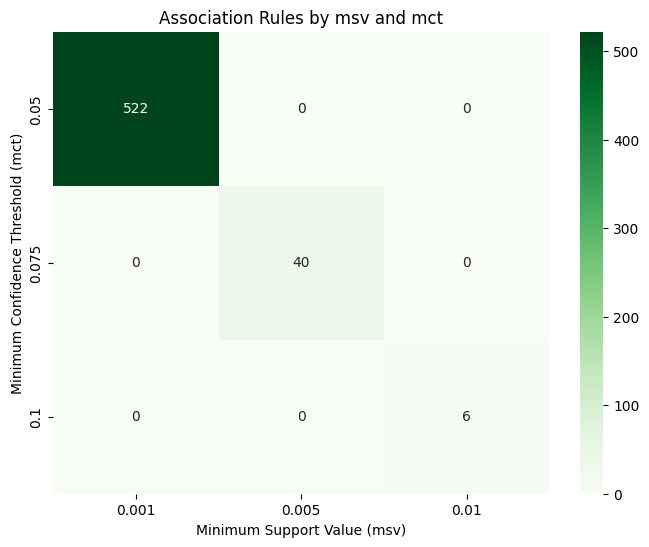

In [12]:
# d. Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct): 0.05, 0.075, 0.1. 
# For each pair (msv, mct), find the number of association rules extracted from the dataset. Construct a heatmap using 
# Seaborn data visualization library 
# (https://seaborn.pydata.org/generated/seaborn.heatmap.html) to show the count results such that the x-axis is msv and the 
# y-axis is mct. (2.5 points)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

class AssociationRule:
    def __init__(self, data, msv_mct_pairs):
        self.data = data
        self.msv_mct_pairs = msv_mct_pairs
        self.rule_counts = np.zeros((len(msv_mct_pairs), len(msv_mct_pairs)))

    def generate_rules(self):
        for i, (min_support, min_confidence) in enumerate(self.msv_mct_pairs):
            # Generate frequent itemsets
            frequent_items = apriori(self.data, min_support=min_support, use_colnames=True)
            # Generate rules
            rules = association_rules(frequent_items, metric="confidence", min_threshold=min_confidence)
            # Store the number of rules
            self.rule_counts[i, i] = len(rules)

    def plot_heatmap(self):
        plt.figure(figsize=(8, 6))
        ax = sns.heatmap(self.rule_counts, annot=True, fmt=".0f", cmap="Greens",
                         xticklabels=[msv for msv, _ in self.msv_mct_pairs],
                         yticklabels=[mct for _, mct in self.msv_mct_pairs])
        plt.title("Association Rules by msv and mct")
        plt.xlabel("Minimum Support Value (msv)")
        plt.ylabel("Minimum Confidence Threshold (mct)")
        plt.show()

encoded_dataframe = gia.encoded_dataframe
msv_mct_pairs = [(0.001, 0.05), (0.005, 0.075), (0.01, 0.1)]

rule_miner = AssociationRule(encoded_dataframe, msv_mct_pairs)
rule_miner.generate_rules()
rule_miner.plot_heatmap()

In [18]:
# e. Split the dataset into 50:50 (i.e., 2 equal subsets) and extract association rules for each data subset for 
# minimum support = 0.005 and minimum confident threshold = 0.075. Show the association rules for both sets. Which association 
# rules appeared in both sets (note that there could be none)? (1 point)

import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

class AssocicationRuleAnalysis:
    def __init__(self, dataframe, test_split_ratio, random_seed, min_support, min_confidence):
        self.dataframe = dataframe
        self.test_split_ratio = test_split_ratio
        self.random_seed = random_seed
        self.min_support = min_support
        self.min_confidence = min_confidence
        self.rules_set1 = None
        self.rules_set2 = None
        
    def split_data(self):
        return train_test_split(self.dataframe, test_size=self.test_split_ratio, random_state=self.random_seed)
    
    def process_set(self, dataset):
        transaction_encoder = TransactionEncoder()
        encoded_array = transaction_encoder.fit(dataset).transform(dataset)
        encoded_dataframe = pd.DataFrame(encoded_array, columns=transaction_encoder.columns_)
        frequent_items = apriori(encoded_dataframe, min_support=self.min_support, use_colnames=True)
        rules = association_rules(frequent_items, metric="confidence", min_threshold=self.min_confidence)
        return rules
    
    def analyze(self):
        set1, set2 = self.split_data()
        self.rules_set1 = self.process_set(set1)
        self.rules_set2 = self.process_set(set2)
        return self.rules_set1, self.rules_set2
    
    def merge_rules(self):
        return pd.merge(self.rules_set1, self.rules_set2, on=list(self.rules_set1.columns))

encoded_dataframe = gia.encoded_dataframe

ass_analysis = AssocicationRuleAnalysis(encoded_dataframe, test_split_ratio=0.5, random_seed=40, min_support=0.005, min_confidence=0.075)

rules_set1, rules_set2 = ass_analysis.analyze()

combined_rules = ass_analysis.merge_rules()

rules_set1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(a),( ),0.02575,0.02425,0.01750,0.679612,28.025223,0.016876,3.045523,0.989805
1,( ),(a),0.02425,0.02575,0.01750,0.721649,28.025223,0.016876,3.500083,0.988284
2,(b),( ),0.00975,0.02425,0.00725,0.743590,30.663495,0.007014,3.805425,0.976913
3,( ),(b),0.02425,0.00975,0.00725,0.298969,30.663495,0.007014,1.412562,0.991430
4,( ),(c),0.02425,0.02000,0.01550,0.639175,31.958763,0.015015,2.716000,0.992785
...,...,...,...,...,...,...,...,...,...,...
5823,(s),"(a, , c, e, i)",0.02475,0.00650,0.00500,0.202020,31.080031,0.004839,1.245019,0.992387
5824,( ),"(a, s, c, e, i)",0.02425,0.00500,0.00500,0.206186,41.237113,0.004879,1.253442,1.000000
5825,(c),"(a, s, , e, i)",0.02000,0.00600,0.00500,0.250000,41.666667,0.004880,1.325333,0.995918
5826,(e),"(a, s, , c, i)",0.02925,0.00575,0.00500,0.170940,29.728725,0.004832,1.199250,0.995480


In [19]:
rules_set2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(a),( ),0.02575,0.02425,0.01750,0.679612,28.025223,0.016876,3.045523,0.989805
1,( ),(a),0.02425,0.02575,0.01750,0.721649,28.025223,0.016876,3.500083,0.988284
2,(b),( ),0.00975,0.02425,0.00725,0.743590,30.663495,0.007014,3.805425,0.976913
3,( ),(b),0.02425,0.00975,0.00725,0.298969,30.663495,0.007014,1.412562,0.991430
4,( ),(c),0.02425,0.02000,0.01550,0.639175,31.958763,0.015015,2.716000,0.992785
...,...,...,...,...,...,...,...,...,...,...
5823,(s),"(a, , c, e, i)",0.02475,0.00650,0.00500,0.202020,31.080031,0.004839,1.245019,0.992387
5824,( ),"(a, s, c, e, i)",0.02425,0.00500,0.00500,0.206186,41.237113,0.004879,1.253442,1.000000
5825,(c),"(a, s, , e, i)",0.02000,0.00600,0.00500,0.250000,41.666667,0.004880,1.325333,0.995918
5826,(e),"(a, s, , c, i)",0.02925,0.00575,0.00500,0.170940,29.728725,0.004832,1.199250,0.995480


In [20]:
combined_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(a),( ),0.02575,0.02425,0.01750,0.679612,28.025223,0.016876,3.045523,0.989805
1,( ),(a),0.02425,0.02575,0.01750,0.721649,28.025223,0.016876,3.500083,0.988284
2,(b),( ),0.00975,0.02425,0.00725,0.743590,30.663495,0.007014,3.805425,0.976913
3,( ),(b),0.02425,0.00975,0.00725,0.298969,30.663495,0.007014,1.412562,0.991430
4,( ),(c),0.02425,0.02000,0.01550,0.639175,31.958763,0.015015,2.716000,0.992785
...,...,...,...,...,...,...,...,...,...,...
5823,(s),"(a, , c, e, i)",0.02475,0.00650,0.00500,0.202020,31.080031,0.004839,1.245019,0.992387
5824,( ),"(a, s, c, e, i)",0.02425,0.00500,0.00500,0.206186,41.237113,0.004879,1.253442,1.000000
5825,(c),"(a, s, , e, i)",0.02000,0.00600,0.00500,0.250000,41.666667,0.004880,1.325333,0.995918
5826,(e),"(a, s, , c, i)",0.02925,0.00575,0.00500,0.170940,29.728725,0.004832,1.199250,0.995480


In [23]:
 # Image Classification using CNN

from keras.utils import to_categorical
import numpy as np
from PIL import Image
import os

dog_breeds = [
    'n02085620-Chihuahua',
 'n02089078-black-and-tan_coonhound',
 'n02091134-whippet',
 'n02108915-French_bulldog',
]

def get_base_image_directory():
    current_directory = os.getcwd()
    return os.path.join(current_directory, 'images')

def load_images_and_labels(breed_directory, breed_index, img_target_size):
    breed_data = []
    breed_labels = []
    
    for image_file in os.listdir(breed_directory):
        image_full_path = os.path.join(breed_directory, image_file)
        with Image.open(image_full_path) as img:
            img_resized = img.convert('RGB').resize(img_target_size)
            breed_data.append(np.array(img_resized))
            breed_labels.append(breed_index)
            
    return breed_data, breed_labels

def preprocess_data_labels(raw_data, raw_labels, num_breeds):
    np_data = np.array(raw_data)
    np_labels = np.array(raw_labels)
    
    np_data_normalized = np_data / 255.0
    np_labels_one_hot = to_categorical(np_labels, num_classes=num_breeds)
    
    return np_data_normalized, np_labels_one_hot

def prepare_dataset(breeds_list, images_dir, target_size):
    all_data = []
    all_labels = []
    
    available_breeds = os.listdir(images_dir)
    
    for index, breed_name in enumerate(breeds_list):
        if breed_name in available_breeds:
            breed_dir_path = os.path.join(images_dir, breed_name)
            breed_data, breed_labels = load_images_and_labels(breed_dir_path, index, target_size)
            all_data.extend(breed_data)
            all_labels.extend(breed_labels)
    
    return preprocess_data_labels(all_data, all_labels, len(breeds_list))

image_dir = get_base_image_directory()
image_size = (128, 128)
normalized_data, one_hot_labels = prepare_dataset(dog_breeds, image_dir, image_size)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(normalized_data, one_hot_labels, test_size=0.20, random_state=40)

In [29]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

train_images_gray = tf.image.rgb_to_grayscale(X_train)
validation_images_gray = tf.image.rgb_to_grayscale(X_val)

class CNNClassifier:
    def __init__(self, num_classes):
        self.num_classes = num_classes
    
    def build(self, kernel_size):
        self.model = Sequential([
            Input(shape=(128, 128, 1)),
            Conv2D(filters=8, kernel_size=(kernel_size, kernel_size), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(units=16, activation='relu'),
            Dense(units=self.num_classes, activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return self.model
    
    def train(self, train_data, train_labels, validation_data, validation_labels):
        history = self.model.fit(train_data, train_labels, epochs=20, validation_data=(validation_data, validation_labels), batch_size=64)
        return history

classifier = CNNClassifier(num_classes=len(dog_breeds))

In [34]:
# Rowan banner ID =  916462953
# last digit is 3
# Hence i have to solve problem (a)

cnn_model_3X3 = classifier.build(kernel_size=3)
training_history_3X3 = classifier.train(train_images_gray, y_train, validation_images_gray, y_val)

cnn_model_5X5 = classifier.build(kernel_size=5)
training_history_5x5 = classifier.train(train_images_gray, y_train, validation_images_gray, y_val)

cnn_model_7x7 = classifier.build(kernel_size=7)
training_history_7x7 = classifier.train(train_images_gray, y_train, validation_images_gray, y_val)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2309 - loss: 1.6743 - val_accuracy: 0.2424 - val_loss: 1.3859
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3236 - loss: 1.3859 - val_accuracy: 0.2424 - val_loss: 1.3855
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3321 - loss: 1.3853 - val_accuracy: 0.2424 - val_loss: 1.3852
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2631 - loss: 1.3862 - val_accuracy: 0.2424 - val_loss: 1.3850
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2993 - loss: 1.3853 - val_accuracy: 0.2424 - val_loss: 1.3842
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3095 - loss: 1.3846 - val_accuracy: 0.2424 - val_loss: 1.3836
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2945 - loss: 1.3850 - val_accuracy: 0.2424 - val_loss: 1.3832
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3055 - loss: 1.3843 - val_accuracy: 0.2424 - val_loss: 1.3826


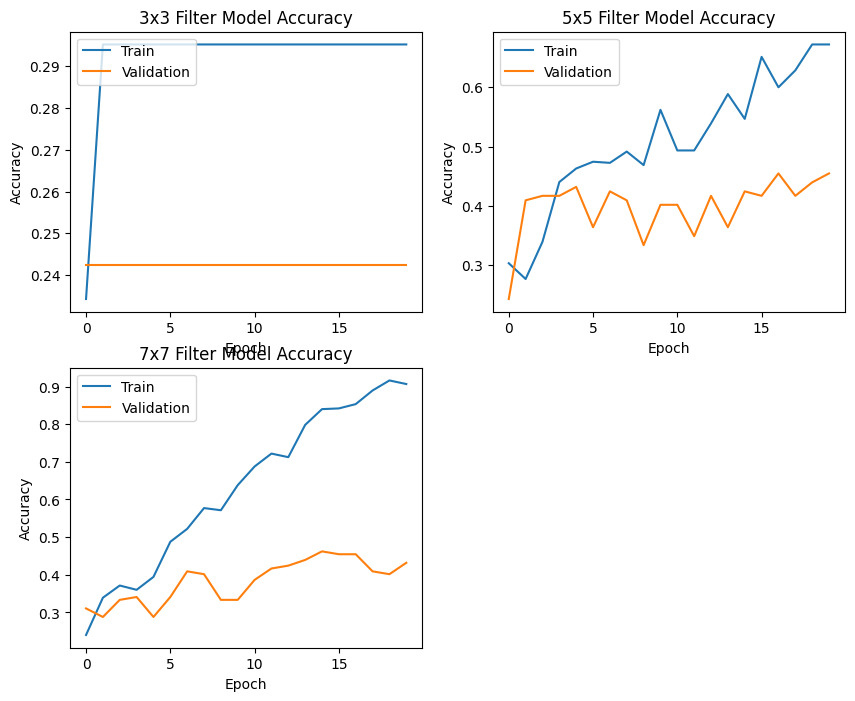

In [46]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.plot(training_history_3X3.history['accuracy'])
plt.plot(training_history_3X3.history['val_accuracy'])
plt.title('3x3 Filter Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(2,2,2)
plt.plot(training_history_5x5.history['accuracy'])
plt.plot(training_history_5x5.history['val_accuracy'])
plt.title('5x5 Filter Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2,2,3)
plt.plot(training_history_7x7.history['accuracy'])
plt.plot(training_history_7x7.history['val_accuracy'])
plt.title('7x7 Filter Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### Describe and discuss what you observe by comparing the performance of the first model and the other two models you constructed in (a), (b) or (c) (depending on which one you did). Are there model overfit or underfit or just right?

+ The 3x3 filter model doesn't seem to learn it's too simplistic. Struggles to identify the underlying patterns, in the dataset.
  
+ On the hand the 5x5 filter model shows signs of improvement in learning. It tends to rely heavily on memorizing the training data rather than generalizing well to new unseen data.
  
+ The 7x7 filter model is a good learner for the training data, but it's memorizing it too much and not doing nearly as well on the unseen data, which is a clear sign of overlearning.

##### Action:
+ When working with the 3x3 filter model we might want to enhance its learning capabilities by boosting model complexity incorporating feature engineering or applying data augmentation techniques.

+ As, for the 5x5 and 7x7 filter models implementing regularization methods utilizing dropout or employing data augmentation could aid in mitigating overfitting issues.
  
+ It's crucial to keep an eye on the models for more epochs to observe if the validation accuracy levels off or drops as these are signs of overfitting.